In [1]:
# Import the libraries for the project
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

# Choose a specified type of graph
mlt.style.use('ggplot')

In [2]:
# Load the dataset into a pandas DataFrame
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# Start the post-proccessing of the DataFrame to graph them
# Remove the unuseful columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [5]:
# Parse the column names to a String format
df_can.columns = list(map(str, df_can.columns))

In [6]:
# Replace the indexing with the Country column to make easier the location
df_can.set_index("Country", inplace=True)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [7]:
# Add the "Total" column to the DataFrame
# df_can["Total"] = df_can.sum(axis=0)

# Filter the DataFrame with a true value vector
condition = df_can["Continent"] == "Asia"
df_as = df_can[condition]
print(df_as.head(2))
print("Dimensions: " + str(df_as.shape))

            Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   
Armenia          Asia   Western Asia  Developing regions     0     0     0   

             1983  1984  1985  1986  ...  2004  2005  2006  2007  2008  2009  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  2978  3436  3009  2652  2111  1746   
Armenia         0     0     0     0  ...   147   224   218   198   205   267   

             2010  2011  2012  2013  
Country                              
Afghanistan  1758  2203  2635  2004  
Armenia       252   236   258   207  

[2 rows x 37 columns]
Dimensions: (49, 37)


In [8]:
# Get the corresponding values to the years
# Create a list of years
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Text(0.5, 0, 'Years')

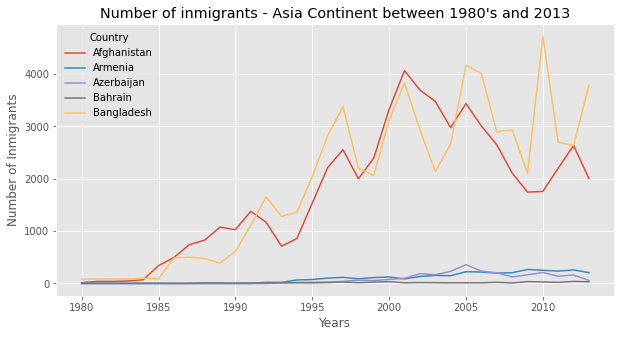

In [9]:
# Let's get the first five Countries of Asia to plot the migration rate
df_as_top5 = df_as.head(5)

# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
# 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 
# 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
# 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
mlt.style.use(['ggplot'])
graph = df_as_top5[years].transpose().plot(kind="line", figsize=(10, 5))
graph.set_title("Number of inmigrants - Asia Continent between 1980's and 2013")
graph.set_ylabel("Number of Inmigrants")
graph.set_xlabel("Years")

In [10]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
condition_asia = df_can["Continent"] == "Asia"

In [12]:
df_as_bar = df_can[condition]
df_as_bar["Totals"] = df_as_bar.sum(axis=1)
df_as_bar.head(2)

<ipython-input-12-b6b5f1c5f651>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_as_bar["Totals"] = df_as_bar.sum(axis=1)
<ipython-input-12-b6b5f1c5f651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as_bar["Totals"] = df_as_bar.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Totals
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [13]:
# df_as_bar["Totals"] = df_as_bar.sum(axis=1)
df_as_bar.sort_values(by=["Totals"], axis=0, ascending=False, inplace=True)
df_as_bartop5 = df_as_bar.head(10)

C:\Users\Giova\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df_as_bartop5_2 = df_as_bartop5[["Totals"]]
df_as_bartop5_2.head()

,Totals
Country,
India,691904
China,659962
Philippines,511391
Pakistan,241600
Iran (Islamic Republic of),175923


Text(2, 670000, '')

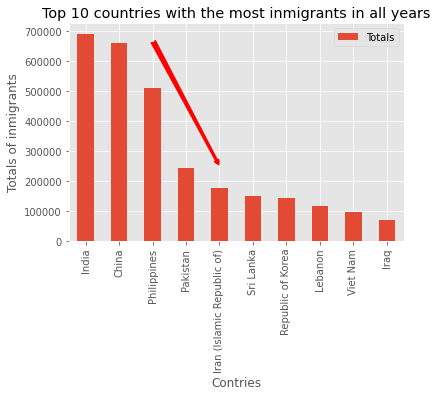

In [15]:
graphBar = df_as_bartop5_2.plot(kind="bar")
graphBar.set_title("Top 10 countries with the most inmigrants in all years")
graphBar.set_ylabel("Totals of inmigrants")
graphBar.set_xlabel("Contries")
graphBar.annotate('',  # s: str. will leave it blank for no text
             xy=(4, 250000),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(2, 670000),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3', color='red', lw=2)
             )

In [18]:
df_continents = df_can.groupby("Continent", axis=0).sum()
df_continents["Totals"] = df_continents.sum(axis=1)
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Totals
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


<AxesSubplot:ylabel='Totals'>

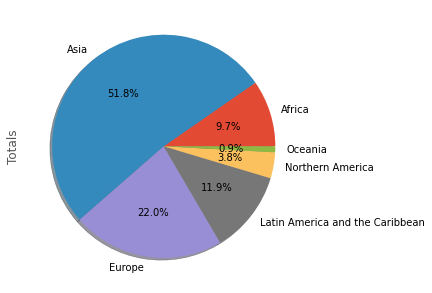

In [23]:
df_continents["Totals"].plot(kind="pie", figsize=(5, 6), shadow=True, autopct='%1.1f%%')

<AxesSubplot:>

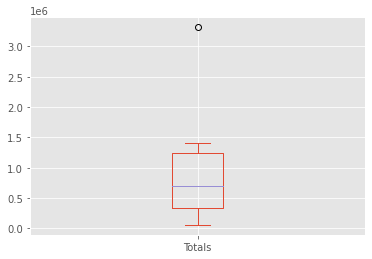

In [24]:
df_continents["Totals"].plot(kind="box")

In [30]:
df_continents.sort_values(by="1980", inplace=True, ascending=False)
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Totals
Continent,,,,,,,,,,,,,,,,,,,,,
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948


count        6.000000
mean     16522.833333
std      15387.171974
min       1942.000000
25%       5307.750000
50%      11229.500000
75%      26539.000000
max      39760.000000
Name: 1980, dtype: float64


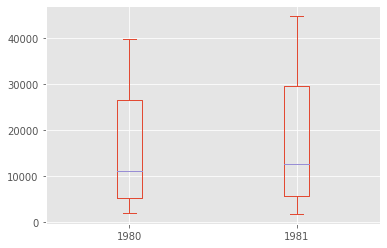

In [38]:
df_continents[["1980", "1981"]].plot(kind="box")
print(df_continents["1980"].describe())

   year  inmigrants
0  1980       39760
1  1981       44802
2  1982       42720
3  1983       24638
4  1984       22287


<AxesSubplot:xlabel='year', ylabel='inmigrants'>

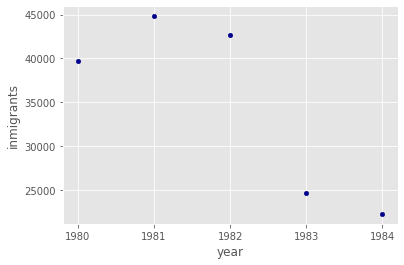

In [72]:
df_scatter5 = df_continents.loc[["Europe"], ["1980", "1981", "1982", "1983", "1984", ]].transpose()
df_scatter5.reset_index(inplace=True)
df_scatter5.columns = ["year", "inmigrants"]
print(df_scatter5.head())
df_scatter5.plot(kind="scatter", x="year", y="inmigrants", color='darkblue')

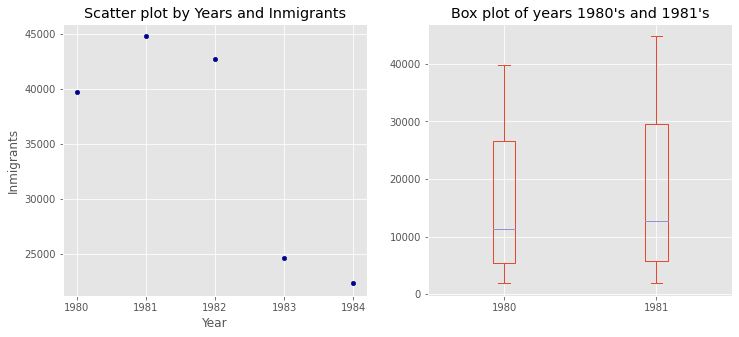

In [79]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_scatter5.plot(kind="scatter", x="year", y="inmigrants", color='darkblue', ax=ax0, figsize=(12, 5))
ax0.set_title('Scatter plot by Years and Inmigrants')
ax0.set_xlabel('Year')
ax0.set_ylabel('Inmigrants')

df_continents[["1980", "1981"]].plot(kind="box", ax=ax1, figsize=(12, 5))
ax1.set_title("Box plot of years 1980's and 1981's")

plt.show()